In [1]:
#reading in dataframes.
import pandas as pd


numData = pd.read_csv(r'C:\Users\Gamer Kyle\Desktop\datasets\numDataNew.csv')
catData = pd.read_csv(r'C:\Users\Gamer Kyle\Desktop\datasets\catDataNew.csv')
ordData = pd.read_csv(r'C:\Users\Gamer Kyle\Desktop\datasets\ordDataNew.csv')
combData = pd.read_csv(r'C:\Users\Gamer Kyle\Desktop\datasets\combData2.csv')

#numData.head()

In [2]:
#Detection Information Gain

#Runtime calculations
import time
start = time.time()

#Creating training
from sklearn.model_selection import train_test_split
y = numData[['catOdds']]
X = numData.drop(['avgOdds','zscore','catOdds'], axis=1)

#Training class with 70% training. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

#Generating a list of descending info gain
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

#Runtime calculations
#end = time.time()
#print("\n"+ str(end - start))

C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


catOddsNUm                1.388542
defencePressure           0.055562
buildUpPlayPassing        0.052962
chanceCreationPassing     0.046083
chanceCreationShooting    0.044637
chanceCreationCrossing    0.039839
buildUpPlaySpeed          0.029287
defenceTeamWidth          0.027723
defenceAggression         0.025041
dtype: float64

In [13]:
from pandas_profiling import ProfileReport

#checking EDA of combData in order to detect correlation amongst combined variables. 
profile = ProfileReport(combData, title = "combData")
profile.to_widgets()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Accuracy: 0.48540614225002005
                       precision    recall  f1-score   support

Almost Guaranteed Win       0.64      0.80      0.71      6373
           Likely win       0.38      0.44      0.41      6498
          Likley loss       0.45      0.31      0.37      5667
         Unlikely win       0.43      0.38      0.40      6404

             accuracy                           0.49     24942
            macro avg       0.47      0.48      0.47     24942
         weighted avg       0.48      0.49      0.47     24942


1.9824435710906982


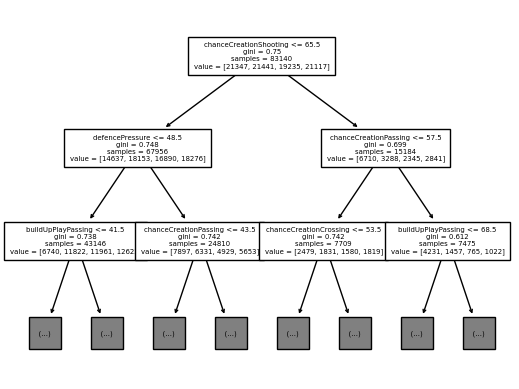

<Figure size 5000x5000 with 0 Axes>

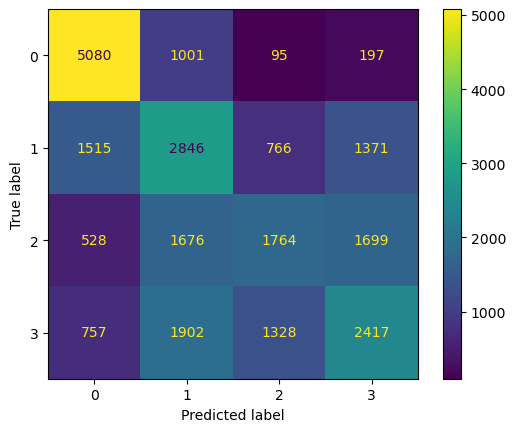

In [14]:
#Runtime calculations
import time
start = time.time()

#Decision Tree as feature selection and baseline modelling
df = numData
inputs = ['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']

X = df[inputs]
y = df['catOdds']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

#Generating the Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

tree.plot_tree(clf, feature_names=inputs,max_depth=2,fontsize=5)
plt.figure(figsize=(50,50))
plt.savefig('tree',dpi=100)

from sklearn import metrics
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Confusion Matrix:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

#Full Decision Tree Creation
#Commenting out the code as the output is way too long.
#text_representation = tree.export_text(clf,feature_names=['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth'])
#print(text_representation)
#with open("decistion_tree.log", "w") as fout:
    #fout.write(text_representation)
    
    
#Runtime calculations
end = time.time()
print("\n"+ str(end - start))

In [36]:
#TESTING K FOLD CROSS VALIDATION - baseline model:

from sklearn.model_selection import KFold

df = numData
inputs = ['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']

X = df[inputs]
y = df['catOdds']
kf = KFold(n_splits = 3)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


TRAIN: [27714 27715 27716 ... 83137 83138 83139] TEST: [    0     1     2 ... 27711 27712 27713]


KeyError: "None of [Int64Index([27714, 27715, 27716, 27717, 27718, 27719, 27720, 27721, 27722,\n            27723,\n            ...\n            83130, 83131, 83132, 83133, 83134, 83135, 83136, 83137, 83138,\n            83139],\n           dtype='int64', length=55426)] are in the [columns]"

In [15]:
#Using Chi squared k select
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from numpy import array 
 
myData = SelectKBest(score_func=chi2,k=6).fit_transform(X,y)
print(myData[:5])
print(X.head())

[[45 45 65 40 50 40]
 [40 65 70 45 45 65]
 [54 46 55 40 50 56]
 [38 46 37 49 49 56]
 [54 49 56 42 41 56]]
   buildUpPlaySpeed  buildUpPlayPassing  chanceCreationPassing  \
0                70                  45                     45   
1                65                  40                     65   
2                46                  54                     46   
3                46                  38                     46   
4                46                  54                     49   

   chanceCreationCrossing  chanceCreationShooting  defencePressure  \
0                      70                      65               40   
1                      65                      70               45   
2                      60                      55               40   
3                      68                      37               49   
4                      72                      56               42   

   defenceAggression  defenceTeamWidth  
0                 50               

Accuracy: 0.46920856386817417
              precision    recall  f1-score   support

           1       0.63      0.76      0.69      6373
           2       0.38      0.42      0.40      6498
           3       0.41      0.39      0.40      6404
           4       0.42      0.29      0.34      5667

    accuracy                           0.47     24942
   macro avg       0.46      0.46      0.46     24942
weighted avg       0.46      0.47      0.46     24942


1.2426719665527344


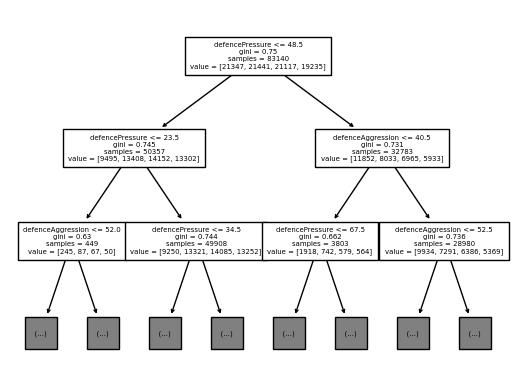

<Figure size 5000x5000 with 0 Axes>

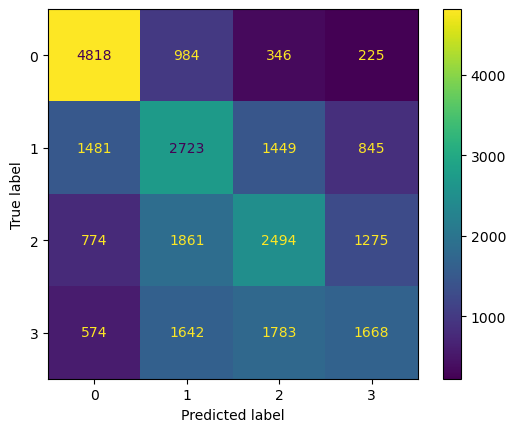

In [16]:
#Creating the various models for Model Building + Analysis step
#Runtime calculations
import time
start = time.time()


#Decision Tree for defensive model
#Decision tree for baseline is already created above so here I will simply create it for just the defense.
inputs = ['defencePressure','defenceAggression','defenceTeamWidth']

Xdef = df[inputs]
y = df['catOddsNUm']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xdef, y, test_size=0.3, random_state=88)


#Generating the tree
lab = preprocessing.LabelEncoder()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xdef, y)

tree.plot_tree(clf, feature_names=inputs,max_depth=2,fontsize=5)
plt.figure(figsize=(50,50))
plt.savefig('tree',dpi=100)


from sklearn import metrics
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report
result1 = metrics.classification_report(y_test, y_pred)
print(result1)


#Runtime calculations
end = time.time()
print("\n"+ str(end - start))

Accuracy: 0.4846844679656804
              precision    recall  f1-score   support

           1       0.64      0.80      0.71      6373
           2       0.38      0.43      0.41      6498
           3       0.42      0.39      0.41      6404
           4       0.44      0.30      0.36      5667

    accuracy                           0.48     24942
   macro avg       0.47      0.48      0.47     24942
weighted avg       0.47      0.48      0.47     24942

|--- chanceCreationShooting <= 65.50
|   |--- buildUpPlayPassing <= 46.50
|   |   |--- buildUpPlayPassing <= 29.50
|   |   |   |--- chanceCreationPassing <= 42.00
|   |   |   |   |--- buildUpPlayPassing <= 28.50
|   |   |   |   |   |--- chanceCreationCrossing <= 46.50
|   |   |   |   |   |   |--- chanceCreationCrossing <= 27.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- chanceCreationCrossing >  27.50
|   |   |   |   |   |   |   |--- buildUpPlaySpeed <= 41.00
|   |   |   |   |   |   |   |   |--- class: 

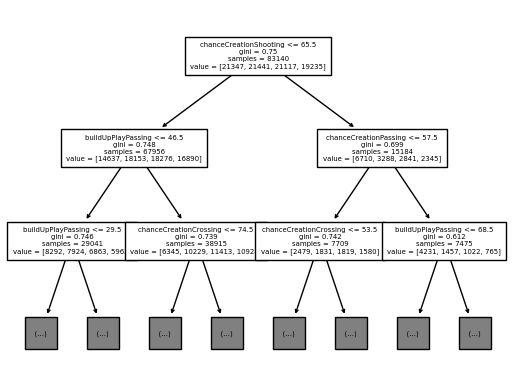

<Figure size 5000x5000 with 0 Axes>

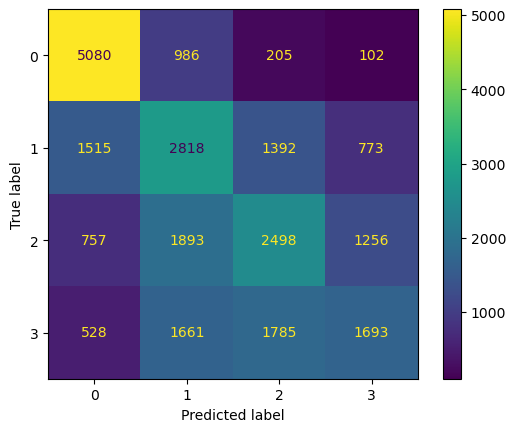

In [17]:
#Creating the various models for Model Building + Analysis step
#Runtime Calculations
import time
start = time.time()

#Decision Tree for non-defensive model
#Decision tree for baseline is already created above so here I will simply create it for just the defense.
inputs = ['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting']

Xdef = df[inputs]
y = df['catOddsNUm']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xdef, y, test_size=0.3, random_state=88)


#Generating the tree
lab = preprocessing.LabelEncoder()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xdef, y)

tree.plot_tree(clf, feature_names=inputs,max_depth=2,fontsize=5)
plt.figure(figsize=(50,50))
plt.savefig('tree',dpi=100)


from sklearn import metrics
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

#Generating text version of full decision tree.
text_representation = tree.export_text(clf,feature_names=['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting'])
print(text_representation)
with open("decisionTreeDefence", "w") as fout:
    fout.write(text_representation)

#Runtime Calculation
end = time.time()
print("\n"+ str(end - start))

Accuracy: 0.4635955416566434
              precision    recall  f1-score   support

           1       0.65      0.78      0.71      6373
           2       0.37      0.40      0.38      6498
           3       0.38      0.35      0.37      6404
           4       0.39      0.31      0.35      5667

    accuracy                           0.46     24942
   macro avg       0.45      0.46      0.45     24942
weighted avg       0.45      0.46      0.45     24942


3.2523133754730225


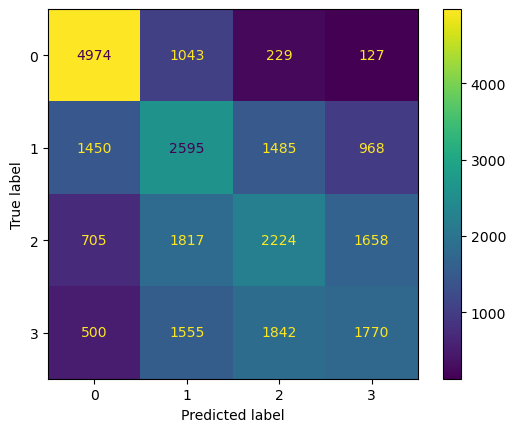

In [18]:
#Random Forest Classifier - Baseline 

#importing everything
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

#Runtime calculations
import time
start = time.time()

#training with 70:30 ratio:
df = numData
inputs = ['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']

X = df[inputs]
y = df['catOddsNUm']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

baselineRF = RandomForestClassifier()
baselineRF.fit(X_train, y_train)

#Accuracy Testing
y_pred = baselineRF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

#Runtime calculations
end = time.time()
print("\n"+ str(end - start))

Accuracy: 0.4503648464437495
              precision    recall  f1-score   support

           1       0.64      0.74      0.69      6373
           2       0.36      0.38      0.37      6498
           3       0.37      0.35      0.36      6404
           4       0.38      0.31      0.34      5667

    accuracy                           0.45     24942
   macro avg       0.44      0.45      0.44     24942
weighted avg       0.44      0.45      0.44     24942


2.149683952331543


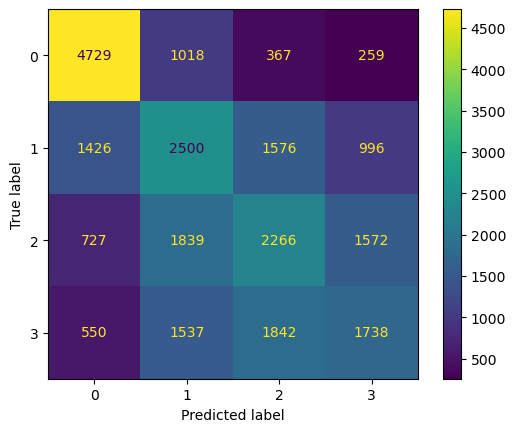

In [19]:
#Random Forest - defense model

#Runtime calculations
import time
start = time.time()

#training with 70:30 ratio:
df = numData
inputs = ['defencePressure','defenceAggression','defenceTeamWidth']

X = df[inputs]
y = df['catOddsNUm']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

baselineRF = RandomForestClassifier()
baselineRF.fit(X_train, y_train)

#Accuracy Testing
y_pred = baselineRF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

#Runtime calculations
end = time.time()
print("\n"+ str(end - start))

Accuracy: 0.4631946114986769
              precision    recall  f1-score   support

           1       0.65      0.78      0.71      6373
           2       0.37      0.40      0.38      6498
           3       0.38      0.33      0.36      6404
           4       0.39      0.33      0.36      5667

    accuracy                           0.46     24942
   macro avg       0.45      0.46      0.45     24942
weighted avg       0.45      0.46      0.45     24942


3.2349648475646973


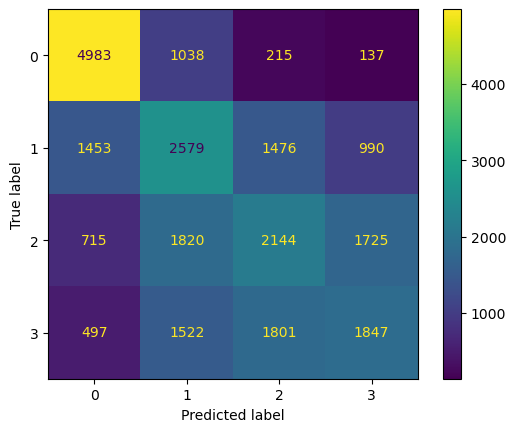

In [25]:
#Random Forest - non-defense model

#Runtime calculations
import time
start = time.time()

#training with 70:30 ratio:
df = numData
inputs = ['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting']

X = df[inputs]
y = df['catOddsNUm']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

baselineRF = RandomForestClassifier()
baselineRF.fit(X_train, y_train)

#Accuracy Testing
y_pred = baselineRF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

#Runtime calculations
end = time.time()
print("\n"+ str(end - start))

C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.4182503407906343
                       precision    recall  f1-score   support

Almost Guaranteed Win       0.60      0.72      0.66      6373
           Likely win       0.32      0.40      0.36      6498
          Likley loss       0.34      0.33      0.34      5667
         Unlikely win       0.36      0.21      0.26      6404

             accuracy                           0.42     24942
            macro avg       0.41      0.42      0.40     24942
         weighted avg       0.41      0.42      0.41     24942


1.6673822402954102


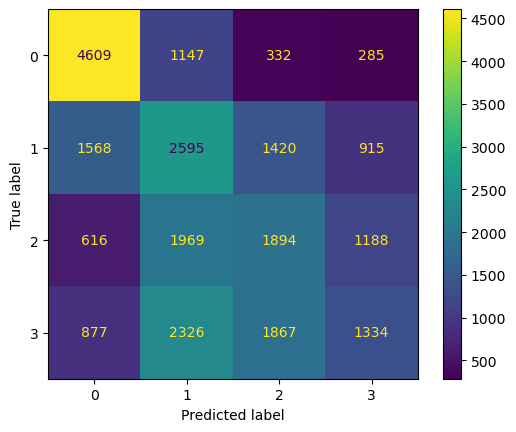

In [26]:
#KNN Analysis - Baseline 

#Runtime calculations
import time
start = time.time()


df = numData
inputs = ['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']
X = df[inputs]
y = df['catOdds']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

#Doing KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


#Checking Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report:
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

#Runtime calculations
end = time.time()
print("\n"+ str(end - start))

C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.40782615668350575
                       precision    recall  f1-score   support

Almost Guaranteed Win       0.56      0.72      0.63      6373
           Likely win       0.32      0.34      0.33      6498
          Likley loss       0.34      0.31      0.32      5667
         Unlikely win       0.34      0.25      0.29      6404

             accuracy                           0.41     24942
            macro avg       0.39      0.41      0.39     24942
         weighted avg       0.39      0.41      0.40     24942


1.4949634075164795


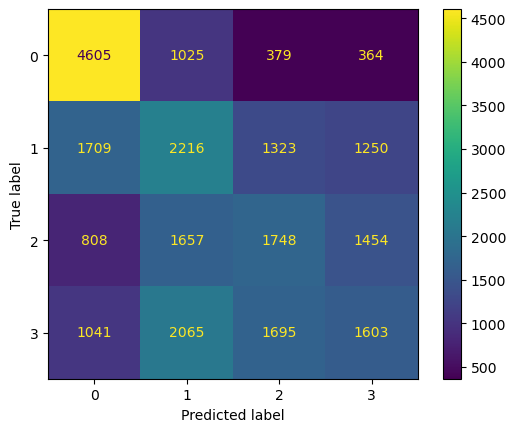

In [27]:
#KNN Analysis - Defensive 

#Runtime calculations
import time
start = time.time()

df = numData
inputs = ['defencePressure','defenceAggression','defenceTeamWidth']
X = df[inputs]
y = df['catOdds']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

#Doing KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


#Checking Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report:
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

#Runtime calculations
end = time.time()
print("\n"+ str(end - start))

C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.41756875952209127
                       precision    recall  f1-score   support

Almost Guaranteed Win       0.61      0.74      0.67      6373
           Likely win       0.32      0.35      0.34      6498
          Likley loss       0.34      0.32      0.33      5667
         Unlikely win       0.34      0.25      0.29      6404

             accuracy                           0.42     24942
            macro avg       0.40      0.42      0.40     24942
         weighted avg       0.40      0.42      0.41     24942


1.5612680912017822


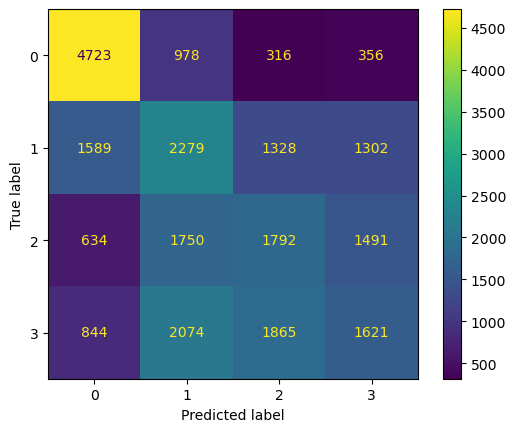

In [28]:
#KNN Analysis - non-Defensive 

#Runtime calculations
import time
start = time.time()

df = numData
inputs = ['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting']
X = df[inputs]
y = df['catOdds']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

#Doing KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


#Checking Accuracy
from sklearn import metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report:
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

#Runtime calculations
end = time.time()
print("\n"+ str(end - start))